# Requirements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [7]:
data=pd.read_csv('spotify_songs (1).csv')

data

In [11]:
data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,pop
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,edm
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,edm
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,edm
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,edm


In [13]:
data.isnull()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
32828,False,True,False,False,False,False,False,False,False,False
32829,False,False,False,False,False,False,False,False,False,False
32830,False,False,False,False,False,True,False,False,False,False
32831,False,True,True,False,False,False,False,False,False,False


In [15]:
data.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

In [17]:
percent=data.isnull().sum() / len(data)*100

In [19]:
percent=percent.reset_index().rename(columns={"index": "column",0: "percent missing"})

In [21]:
percent

,column,percent missing
0,danceability,11.153413
1,energy,34.297810
2,loudness,23.208357
3,speechiness,7.190936
4,acousticness,2.722870
5,instrumentalness,19.705784
6,liveness,9.094509
7,valence,22.809369
8,tempo,19.970761
9,genre,0.000000


Explore the dataset using visualizations of your choice.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29171 non-null  float64
 1   energy            21572 non-null  float64
 2   loudness          25213 non-null  float64
 3   speechiness       30472 non-null  float64
 4   acousticness      31939 non-null  float64
 5   instrumentalness  26363 non-null  float64
 6   liveness          29847 non-null  float64
 7   valence           25344 non-null  float64
 8   tempo             26276 non-null  float64
 9   genre             32833 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.5+ MB


In [26]:
data.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,29171.000000,21572.000000,25213.000000,30472.000000,31939.000000,26363.000000,29847.000000,25344.000000,26276.000000
mean,0.655237,0.697964,-6.700534,0.107035,0.175157,0.083894,0.190442,0.510760,120.905999
std,0.145108,0.180924,2.975182,0.101335,0.219659,0.223003,0.154312,0.233063,26.968530
min,0.000000,0.000175,-36.624000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.563000,0.582000,-8.149000,0.041100,0.015000,0.000000,0.092900,0.330000,99.946000
50%,0.672000,0.721000,-6.164000,0.062500,0.080200,0.000016,0.127000,0.512000,121.978000
75%,0.761000,0.839000,-4.632000,0.132000,0.254000,0.004810,0.249000,0.694000,133.986250
max,0.983000,1.000000,1.275000,0.918000,0.994000,0.994000,0.994000,0.990000,220.252000


<Axes: >

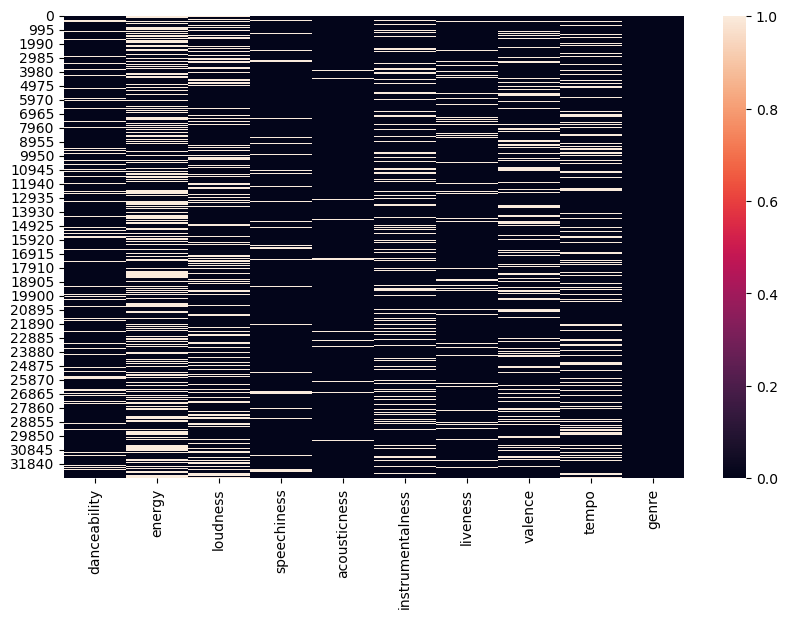

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull())

<Axes: xlabel='energy', ylabel='count'>

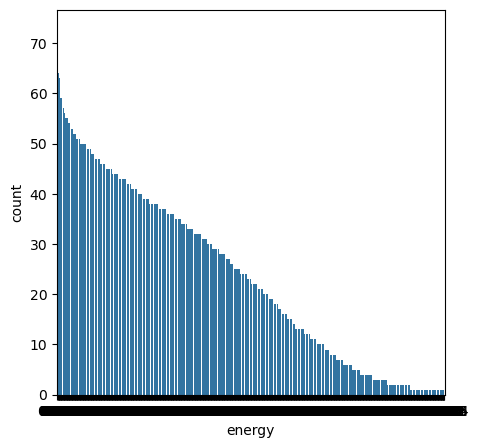

In [30]:
plt.figure(figsize=(5, 5))#eksponencijalna raspredelba
sns.countplot(data=data, x='energy', order=data['energy'].value_counts().index)

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>]], dtype=object)

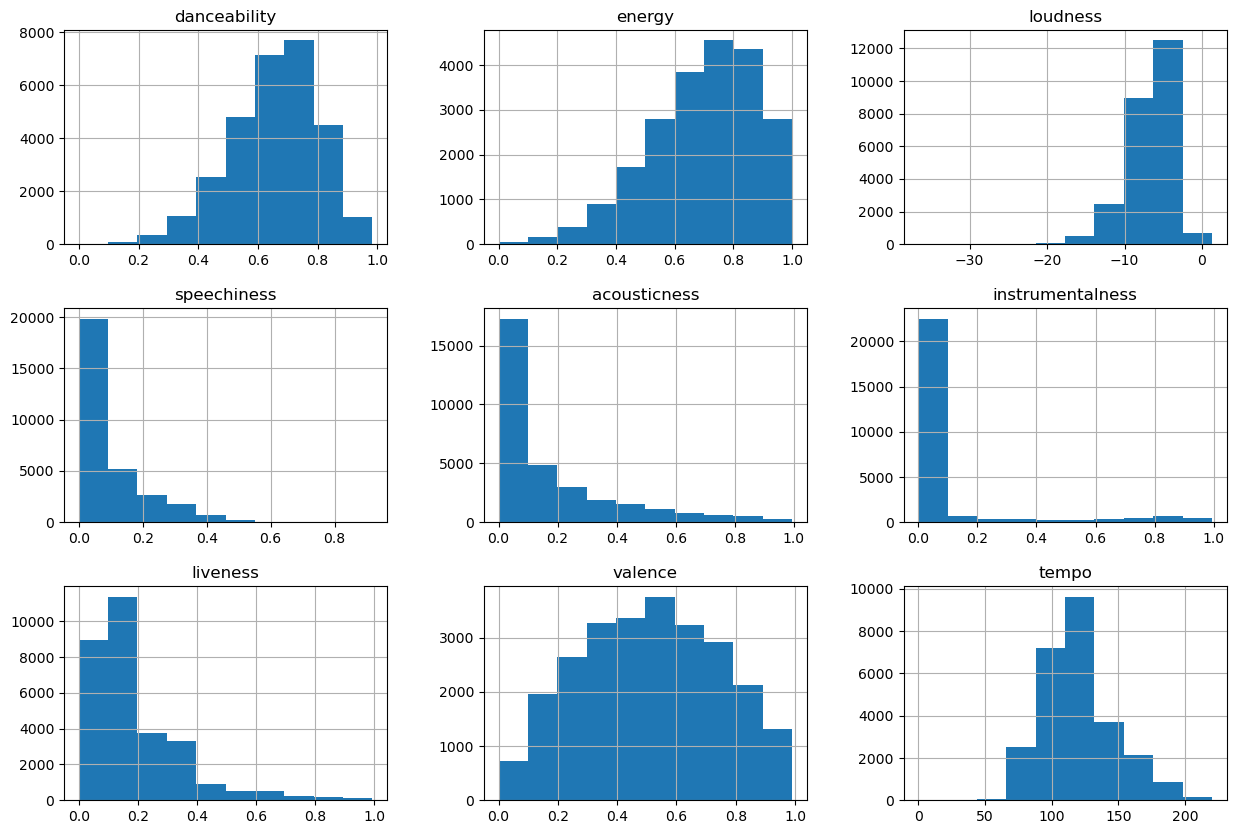

In [37]:
#data.hist(bins=15, figsize=(15, 10))
data.hist(figsize=(15, 10))

<Axes: >

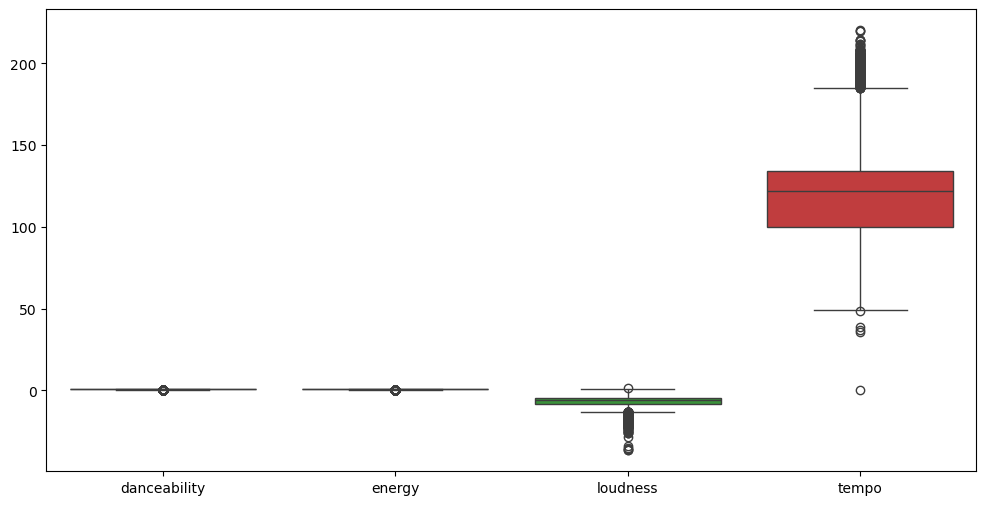

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['danceability', 'energy', 'loudness', 'tempo']])

<Axes: >

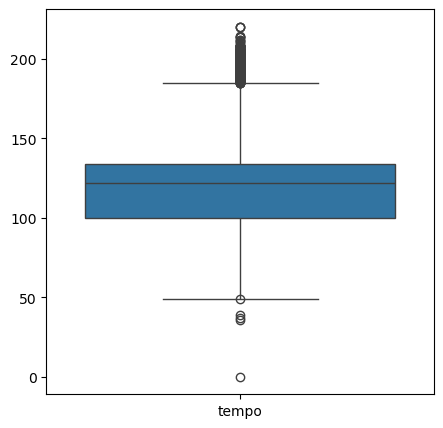

In [89]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data[['tempo']])

In [95]:
from missingno import matrix, dendrogram, bar

<Axes: >

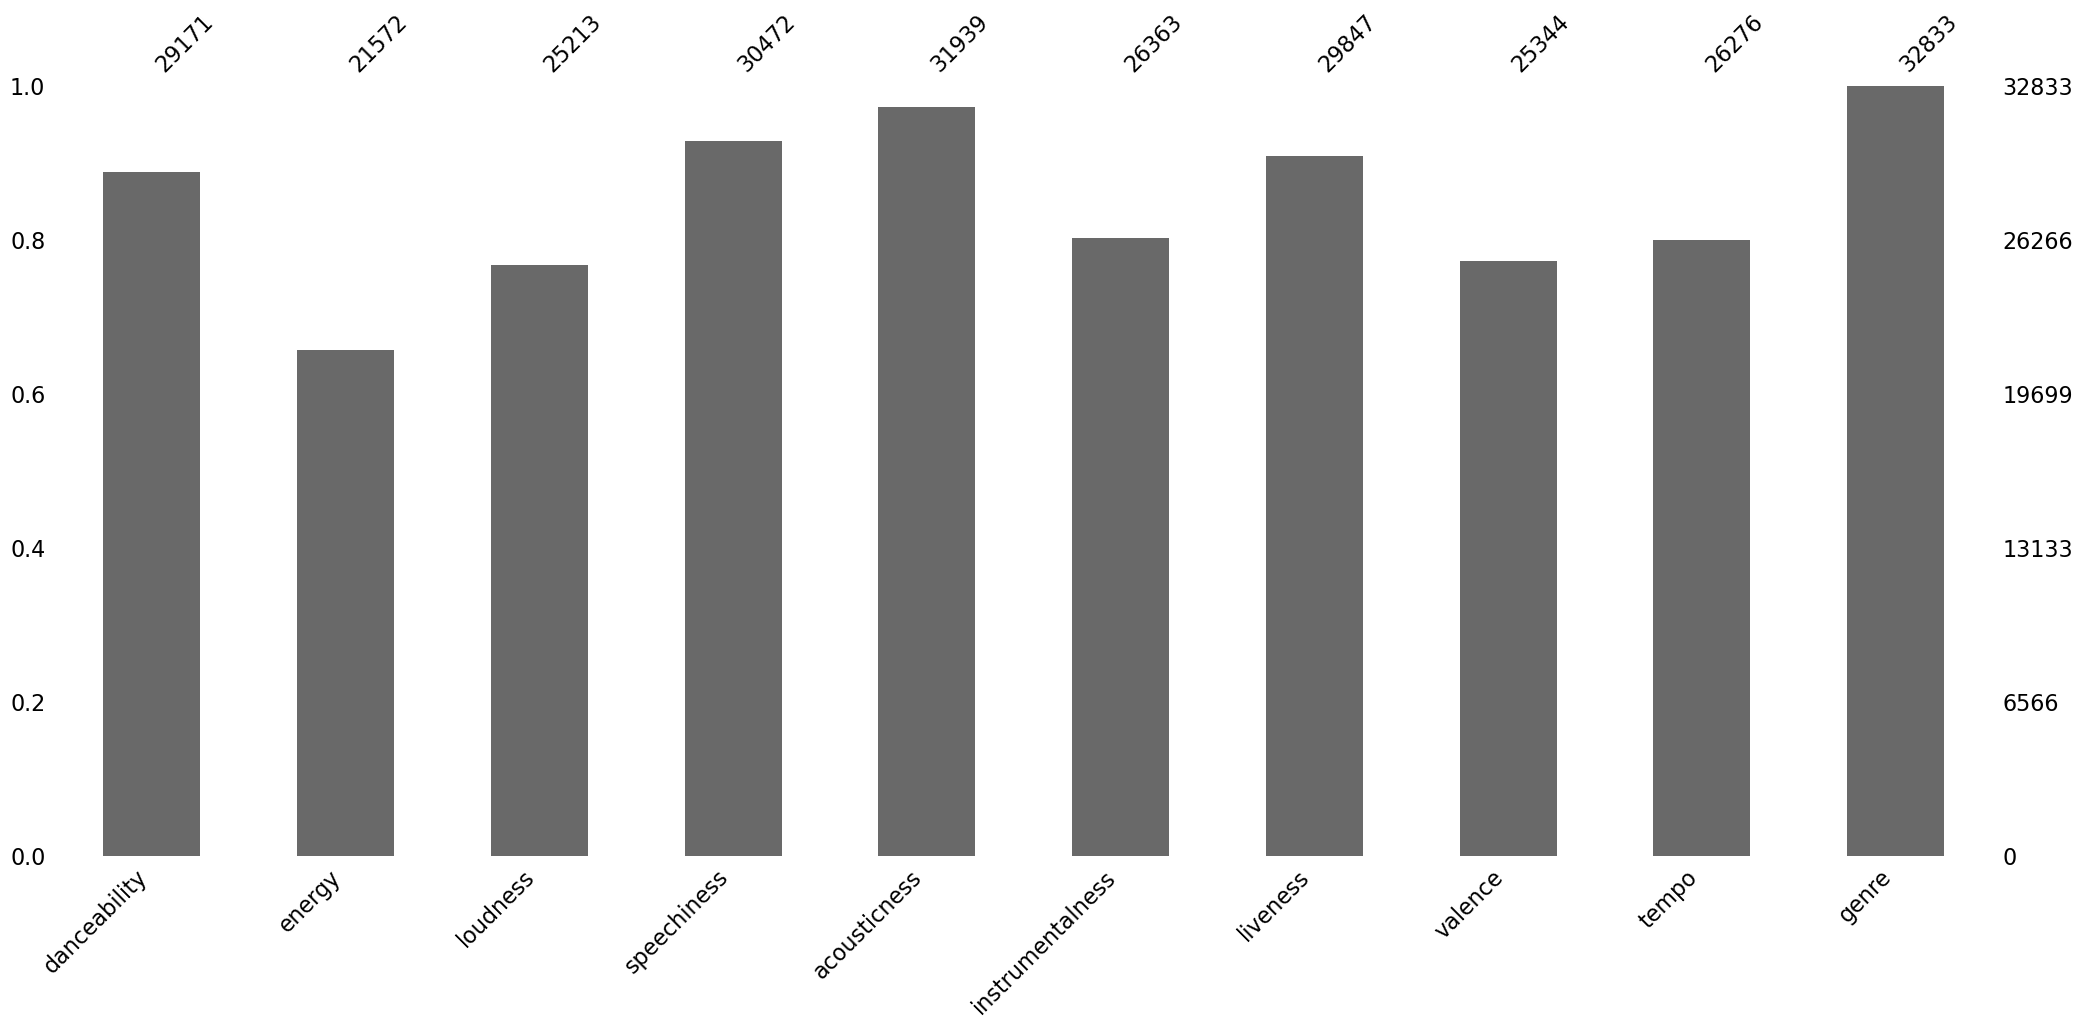

In [97]:
bar(data)

<Axes: >

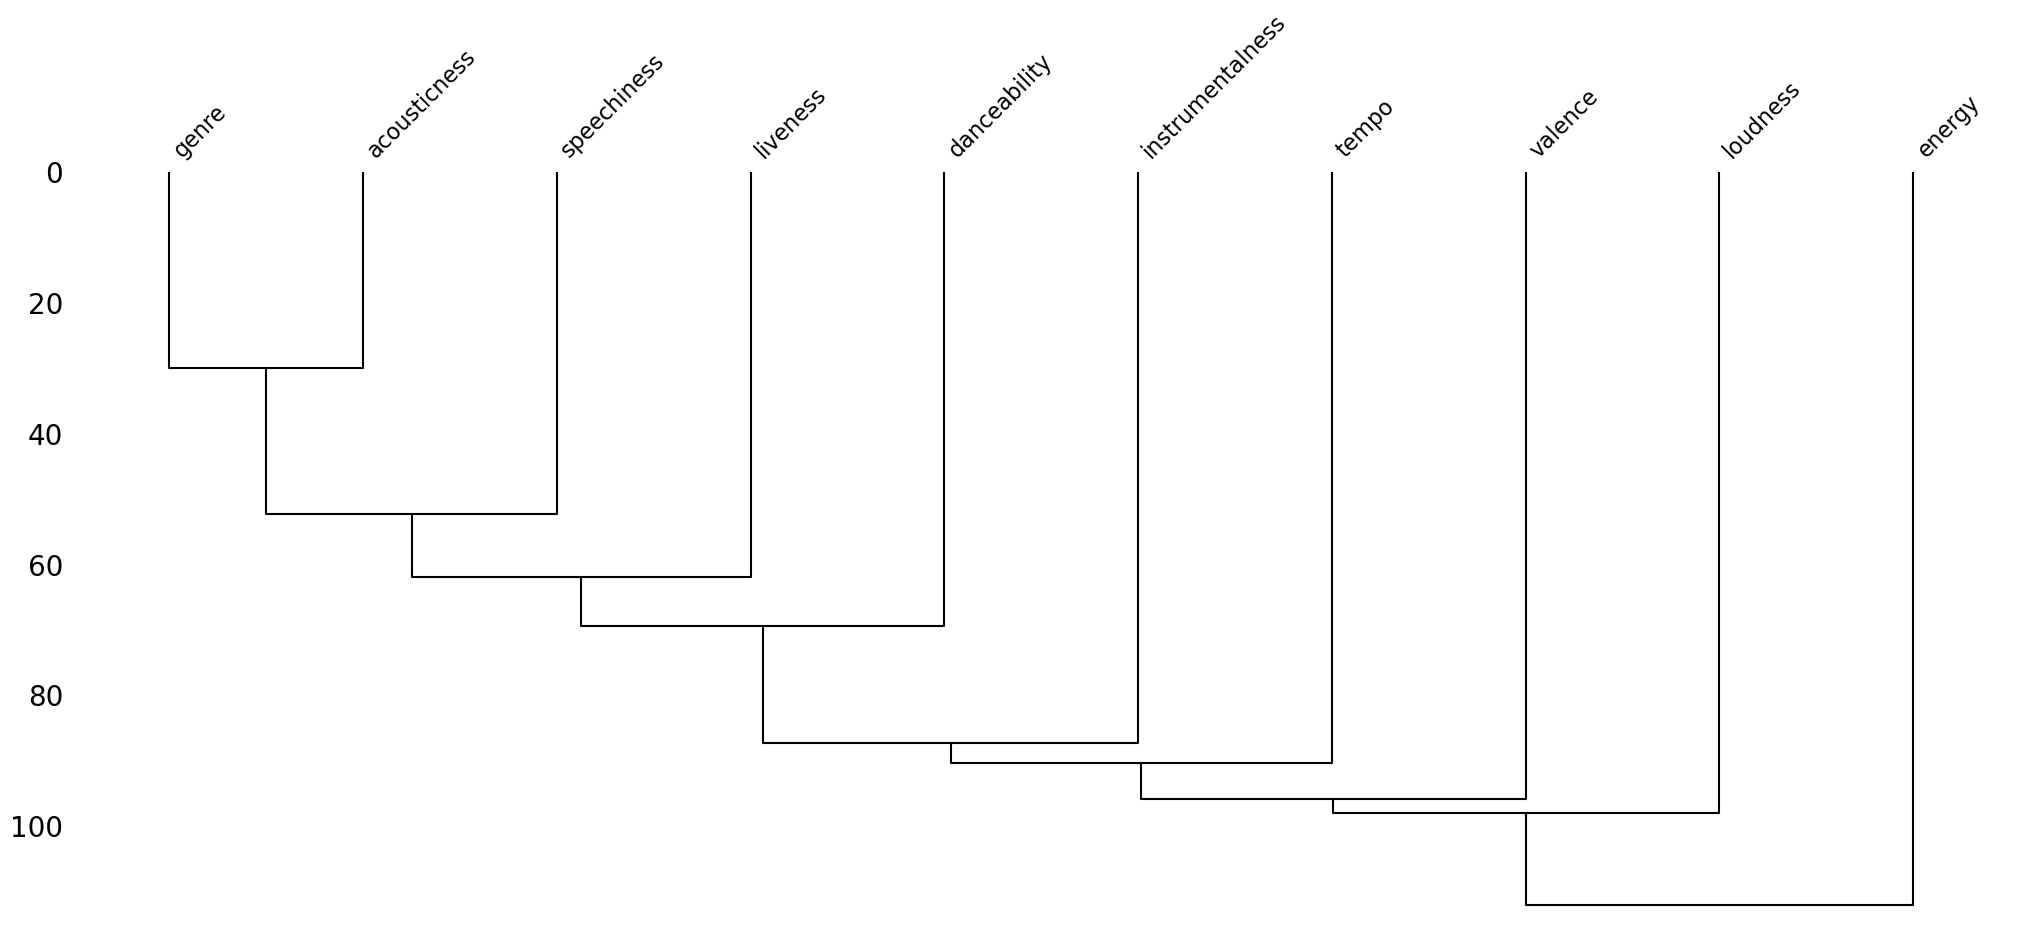

In [101]:
dendrogram(data)

Check if the dataset is balanced.

In [103]:
genre_counts = data['genre'].value_counts()

Text(0, 0.5, 'Count')

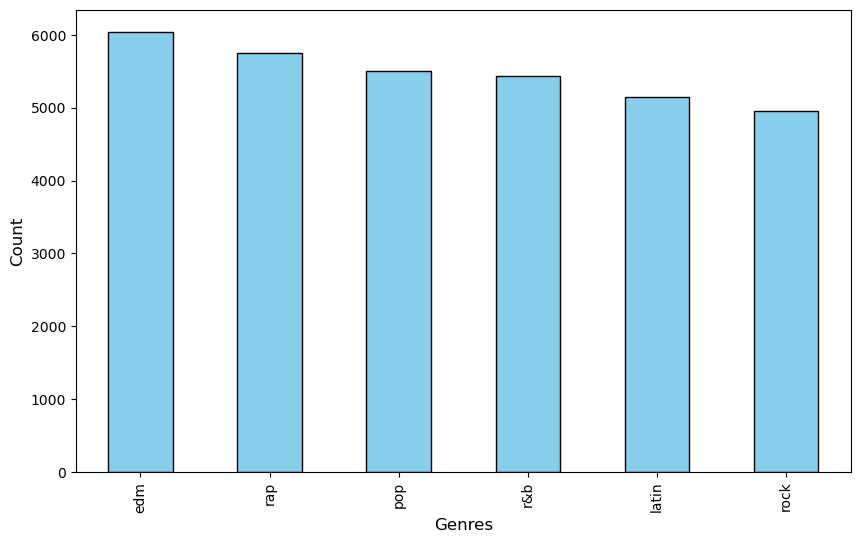

In [105]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Genres", fontsize=12)
plt.ylabel("Count", fontsize=12)
#site se slicni zatoa e balansirana

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [107]:
percent=data.isnull().sum() / len(data)*100
percent=percent.reset_index().rename(columns={"index": "column",0: "percent missing"})
percent

,column,percent missing
0,danceability,11.153413
1,energy,34.297810
2,loudness,23.208357
3,speechiness,7.190936
4,acousticness,2.722870
5,instrumentalness,19.705784
6,liveness,9.094509
7,valence,22.809369
8,tempo,19.970761
9,genre,0.000000


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

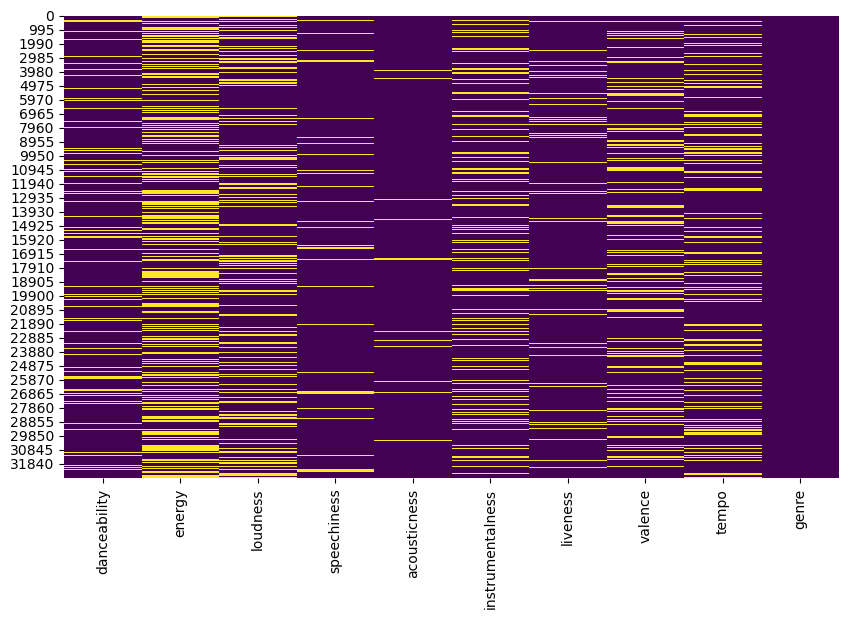

In [109]:
#HEATMAP- kade e koncentrirana missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
#mozeme da vidime deka nasekade se rasprostraneti na primer nema nekade samo na pocetok ili samo na krajot

<Axes: >

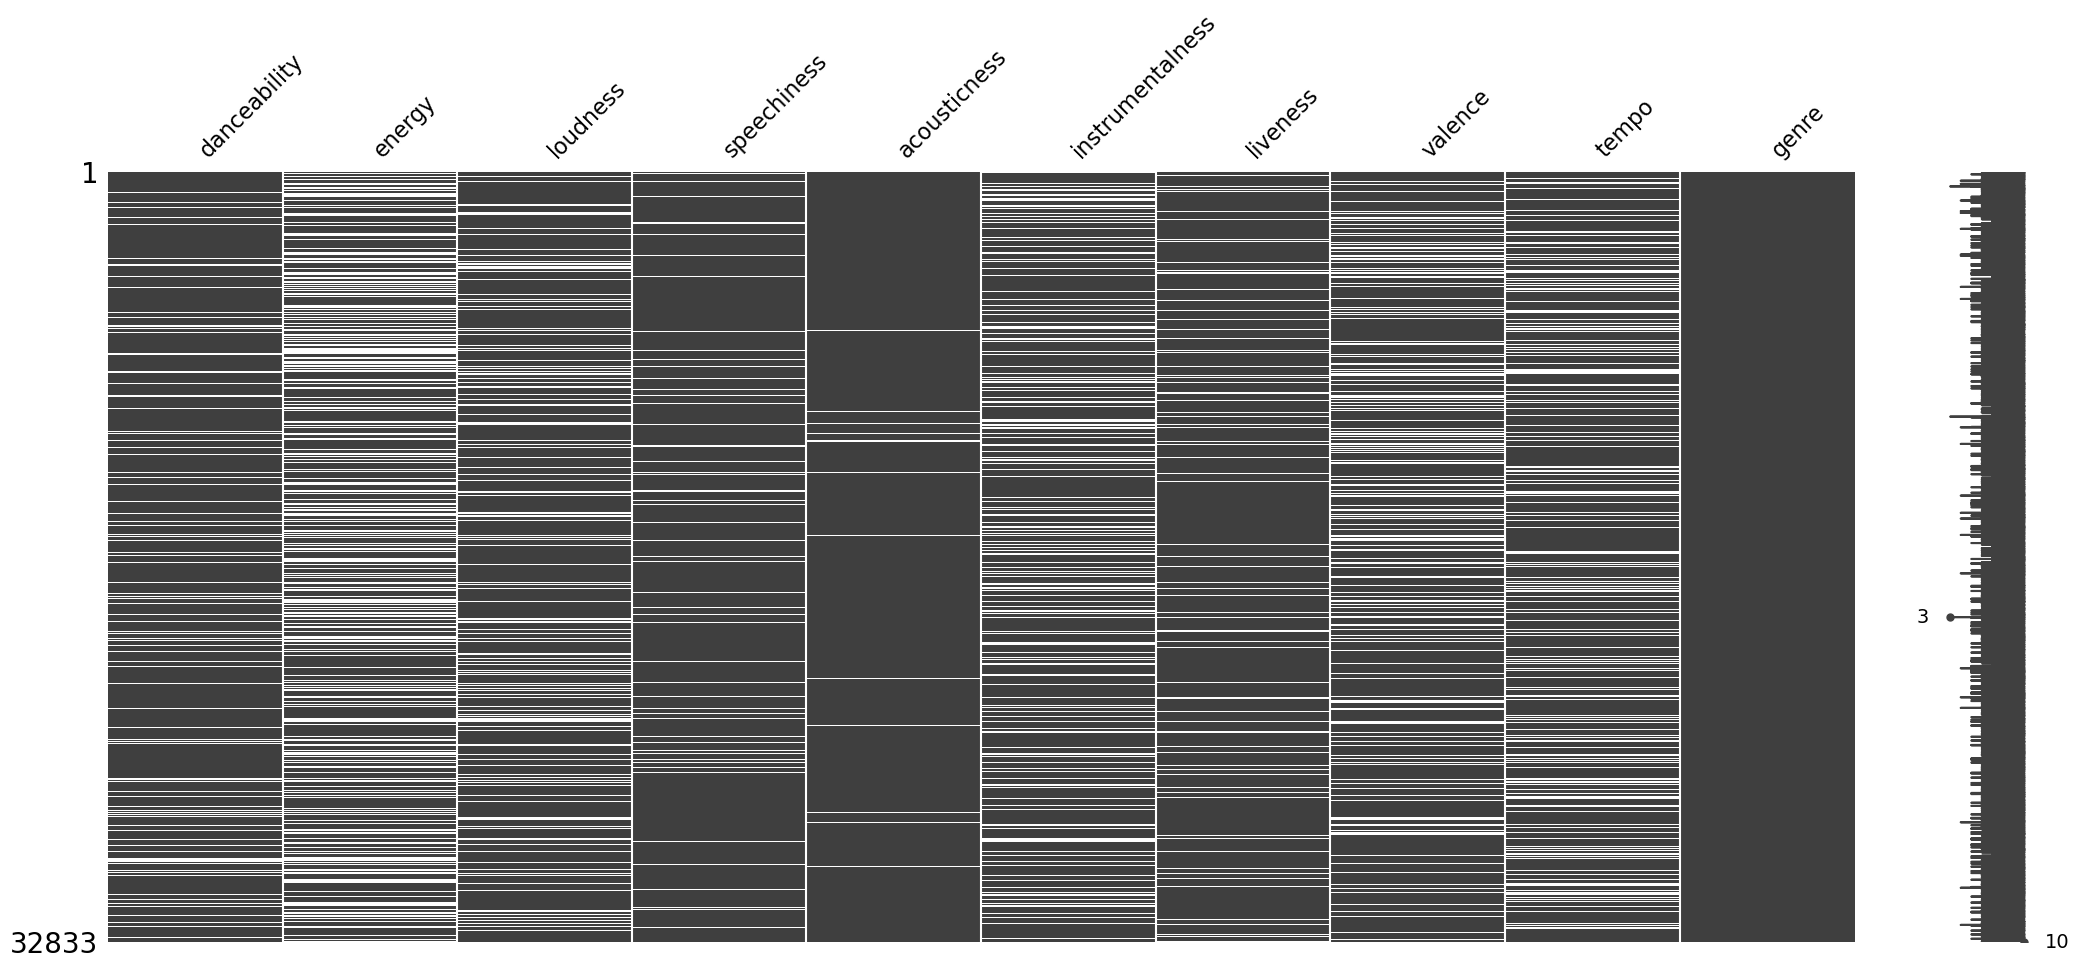

In [113]:
import missingno as msno
msno.matrix(data)

<Axes: >

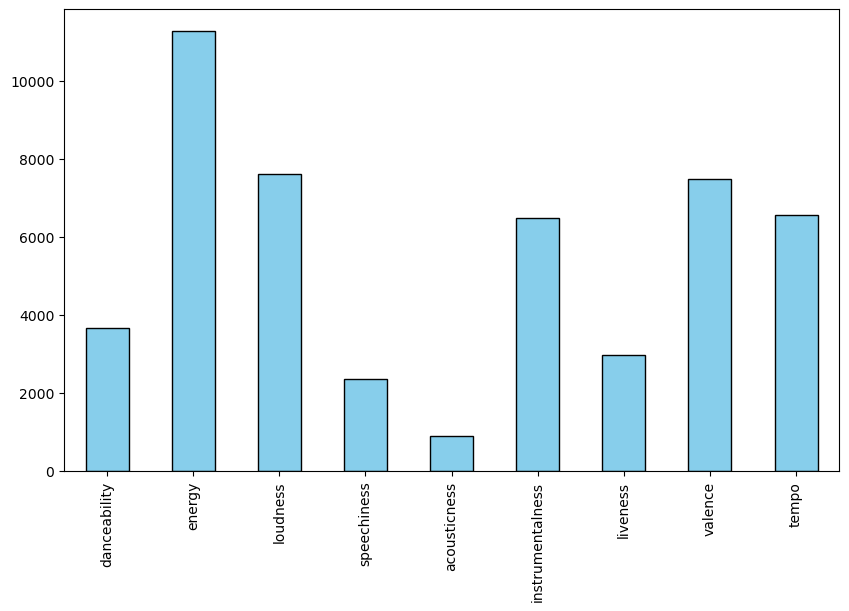

In [115]:
#Bar-kolku vrednosti se missing (samo tamu kade sto ima)
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only show columns with missing values

plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='skyblue', edgecolor='black')

<Axes: >

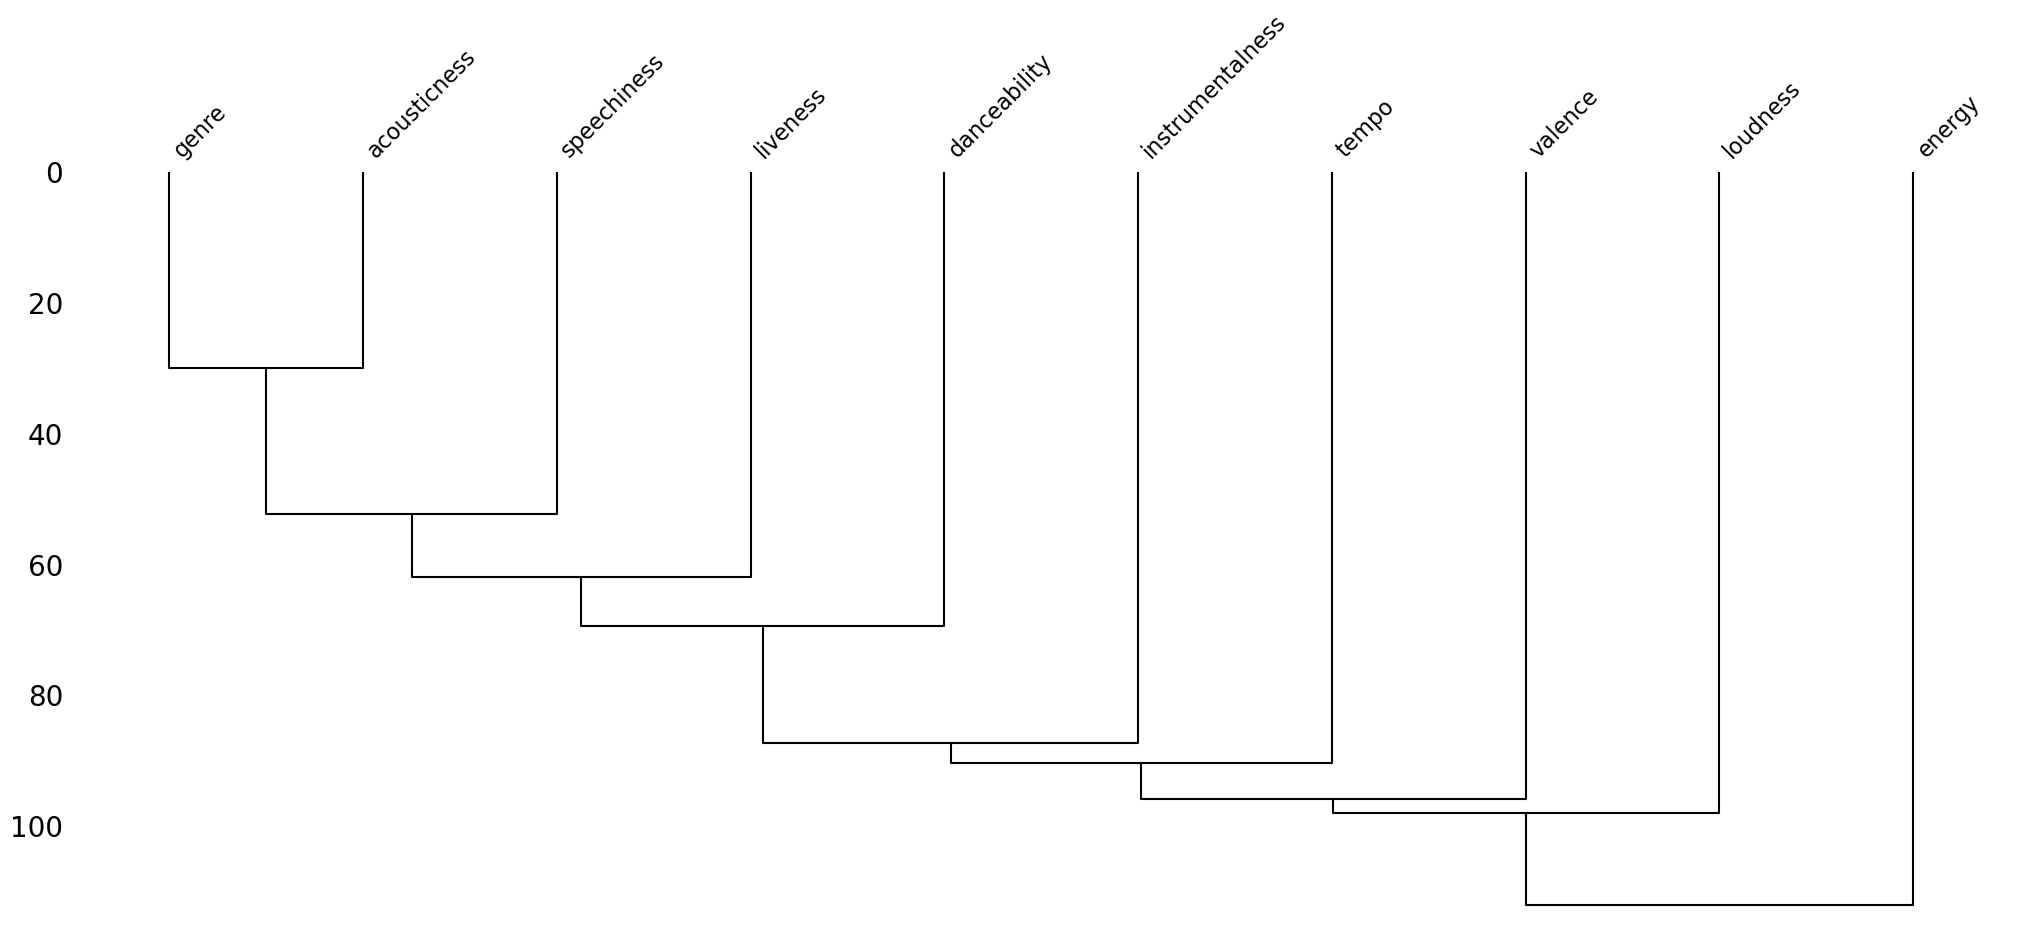

In [117]:
msno.dendrogram(data)#korelacija pomegu vrednostite

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [125]:
data.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,29171.000000,21572.000000,25213.000000,30472.000000,31939.000000,26363.000000,29847.000000,25344.000000,26276.000000
mean,0.655237,0.697964,-6.700534,0.107035,0.175157,0.083894,0.190442,0.510760,120.905999
std,0.145108,0.180924,2.975182,0.101335,0.219659,0.223003,0.154312,0.233063,26.968530
min,0.000000,0.000175,-36.624000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.563000,0.582000,-8.149000,0.041100,0.015000,0.000000,0.092900,0.330000,99.946000
50%,0.672000,0.721000,-6.164000,0.062500,0.080200,0.000016,0.127000,0.512000,121.978000
75%,0.761000,0.839000,-4.632000,0.132000,0.254000,0.004810,0.249000,0.694000,133.986250
max,0.983000,1.000000,1.275000,0.918000,0.994000,0.994000,0.994000,0.990000,220.252000


In [123]:
data['instrumentalness'].median()

1.64e-05

In [133]:
data.instrumentalness = data.instrumentalness.fillna(data.instrumentalness.median())

In [137]:
data.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness        0
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

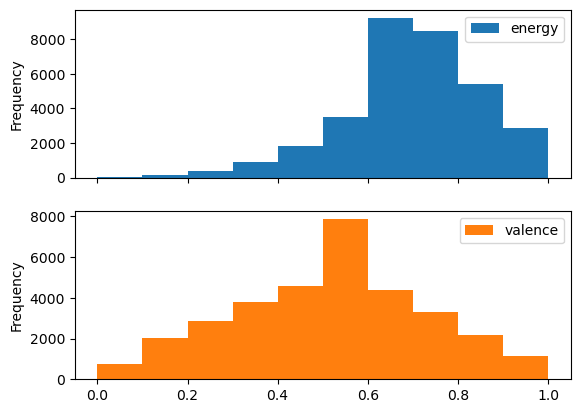

In [141]:
data[['energy', 'valence']].plot.hist(subplots=True)

In [139]:
from sklearn.impute import KNNImputer

# Create an imputer object with KNN
knn_imputer = KNNImputer(n_neighbors=5)  # You can change the number of neighbors if needed

# Apply KNN imputation to the relevant columns
columns_to_impute = ['energy', 'valence']

# Use KNN imputer to fill the missing values in 'energy' and 'valence'
data[columns_to_impute] = knn_imputer.fit_transform(data[columns_to_impute])

In [143]:
data.isnull().sum()

danceability        3662
energy                 0
loudness            7620
speechiness         2361
acousticness         894
instrumentalness       0
liveness            2986
valence                0
tempo               6557
genre                  0
dtype: int64

In [145]:
data.describe()#statistikata ne e drasticno promenata posle vmetnuvanjeto na missing values taka sto odgovaraat metodite

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,29171.000000,32833.000000,25213.000000,30472.000000,31939.000000,32833.000000,29847.000000,32833.000000,26276.000000
mean,0.655237,0.700547,-6.700534,0.107035,0.175157,0.067365,0.190442,0.514106,120.905999
std,0.145108,0.152876,2.975182,0.101335,0.219659,0.202592,0.154312,0.210380,26.968530
min,0.000000,0.000175,-36.624000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.563000,0.626000,-8.149000,0.041100,0.015000,0.000000,0.092900,0.369000,99.946000
50%,0.672000,0.705000,-6.164000,0.062500,0.080200,0.000016,0.127000,0.510760,121.978000
75%,0.761000,0.801000,-4.632000,0.132000,0.254000,0.001110,0.249000,0.659000,133.986250
max,0.983000,1.000000,1.275000,0.918000,0.994000,0.994000,0.994000,0.990000,220.252000


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

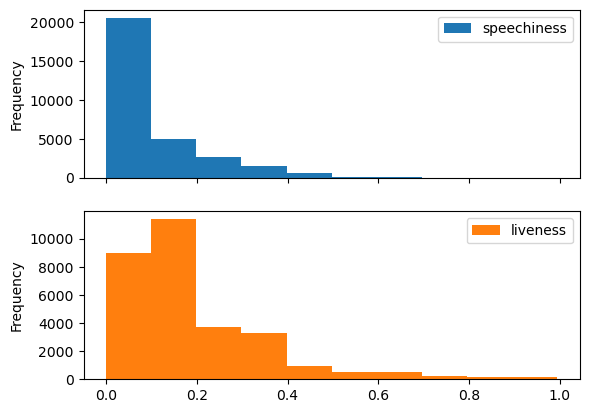

In [147]:
data[['speechiness', 'liveness']].plot.hist(subplots=True)

In [149]:
knn_imputer = KNNImputer(n_neighbors=5)  # You can change the number of neighbors if needed

# Apply KNN imputation to the relevant columns
columns_to_impute = ['speechiness', 'liveness']

# Use KNN imputer to fill the missing values in 'energy' and 'valence'
data[columns_to_impute] = knn_imputer.fit_transform(data[columns_to_impute])

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

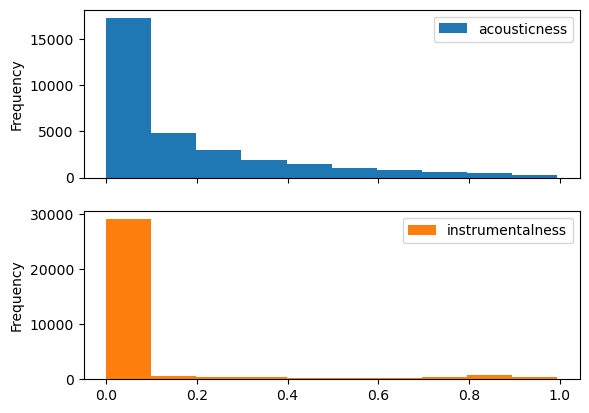

In [151]:
data[['acousticness', 'instrumentalness']].plot.hist(subplots=True)

In [153]:
knn_imputer = KNNImputer(n_neighbors=5)  # You can change the number of neighbors if needed

# Apply KNN imputation to the relevant columns
columns_to_impute = ['acousticness', 'instrumentalness']

# Use KNN imputer to fill the missing values in 'energy' and 'valence'
data[columns_to_impute] = knn_imputer.fit_transform(data[columns_to_impute])

In [155]:
data.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,29171.000000,32833.000000,25213.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,26276.000000
mean,0.655237,0.700547,-6.700534,0.108095,0.175549,0.067365,0.191452,0.514106,120.905999
std,0.145108,0.152876,2.975182,0.098584,0.217141,0.202592,0.148759,0.210380,26.968530
min,0.000000,0.000175,-36.624000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.563000,0.626000,-8.149000,0.042200,0.015900,0.000000,0.095600,0.369000,99.946000
50%,0.672000,0.705000,-6.164000,0.066600,0.084600,0.000016,0.135000,0.510760,121.978000
75%,0.761000,0.801000,-4.632000,0.135000,0.250000,0.001110,0.247000,0.659000,133.986250
max,0.983000,1.000000,1.275000,0.918000,0.994000,0.994000,0.994000,0.990000,220.252000


In [157]:
data.isnull().sum()

danceability        3662
energy                 0
loudness            7620
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo               6557
genre                  0
dtype: int64

In [159]:
data.danceability = data.danceability.fillna(data.danceability.median())

In [161]:
data.loudness = data.loudness.fillna(data.loudness.mean())

In [163]:
data.tempo = data.tempo.fillna(data.tempo.mean())

In [165]:
data.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#koga target ni e kategoriska togas Logistic, koga e numericka Linear
from sklearn.metrics import accuracy_score

# Separate target and features
X = data.drop(columns=['genre'])  # Features (keep all columns except 'genre')
y = data['genre']  # Target variable (genre)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.4241


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Feature Scaling
Standardize the features appropriately.

In [272]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you already have X (features) and y (target)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the range of transformed features (they should be between 0 and 1)
print(f"Minimum value in X_train_scaled: {X_train_scaled.min()}")
print(f"Maximum value in X_train_scaled: {X_train_scaled.max()}")

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

Minimum value in X_train_scaled: 0.0
Maximum value in X_train_scaled: 1.0
Accuracy: 0.4131262372468403


## Model Selection

Choose and train an approriate model for the given task.

In [ ]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different classification metrics.

In [ ]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.